ANALISIS DE LOS CONTENIDOS DE NEXTFLIX HASTA EL AÑO 2021

In [ ]:
#Importar las librerias necesarias
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Importar el archivo fuente para el analisis
datos = pd.read_csv('C:/Users/ASUS-72937/Documents/curso-py/project/netflix_dataset.csv')

In [7]:
#Informacion de la base de datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
datos.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
#Cantidad de Peliculas y Series
total_cont = datos['type'].value_counts()

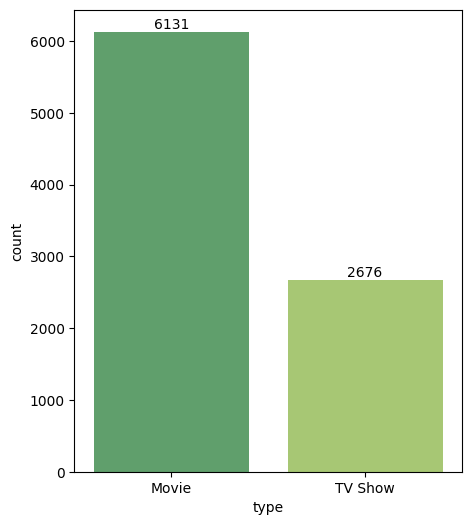

In [10]:
#Grafica | Peliculas y Series
plt.figure(figsize=(5,6))
sns.countplot(x=datos['type'], data=datos, palette="summer")

for i, count in enumerate(total_cont):
    plt.text(i, count, str(count), ha='center', va='bottom')


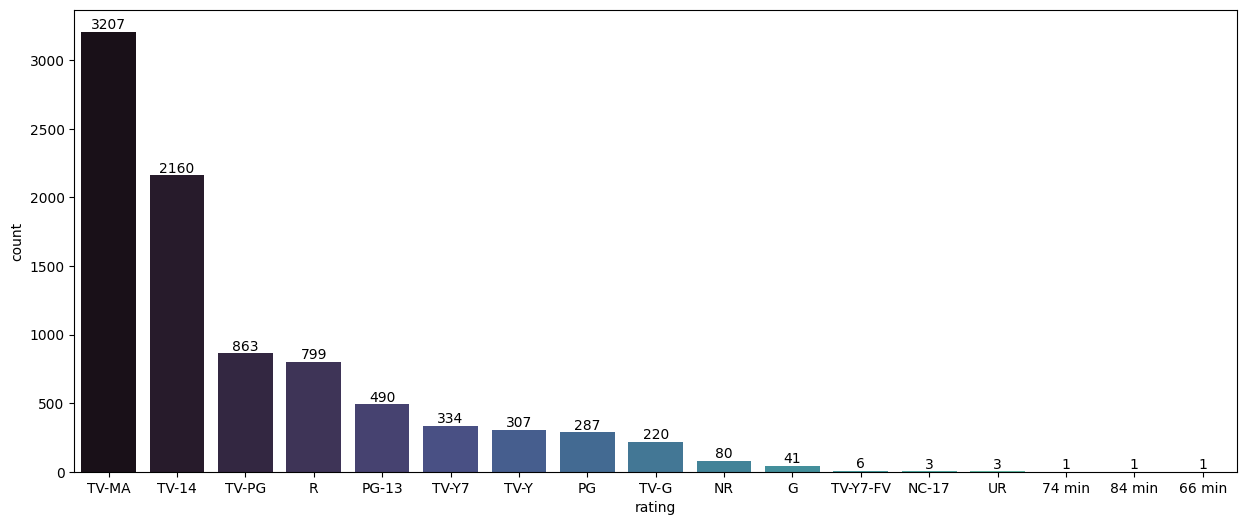

In [11]:
#Grafica | Cantidad de Contenido por Clasificación de las Producciones 
plt.figure(figsize=(15,6))

count_datos = datos['rating'].value_counts()

order_datos= count_datos.sort_values(ascending=False).index

sns.countplot(x=datos['rating'], data=datos, palette="mako", order= order_datos)

for i, count in enumerate(count_datos):
    plt.text(i, count, str(count), ha='center', va='bottom')

<Axes: xlabel='rating', ylabel='count'>

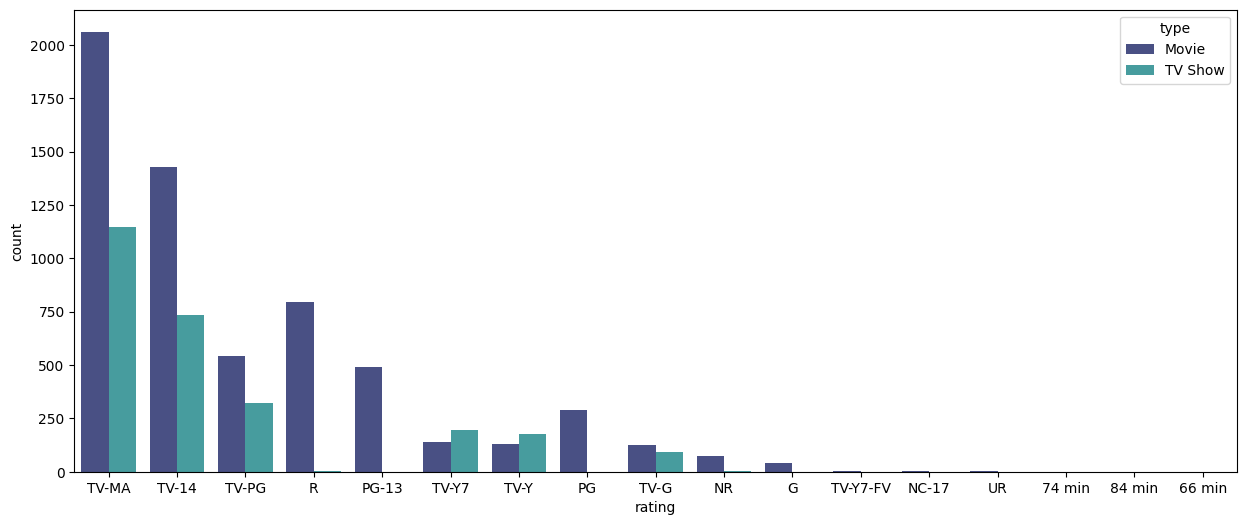

In [12]:
##Grafica | Dividido en Series y Peliculas
plt.figure(figsize=(15,6))

sns.countplot(x=datos['rating'], data=datos, palette="mako", hue=datos['type'], order=order_datos)



PELICULAS

In [13]:
data_peliculas = datos[datos['type']== 'Movie']

In [14]:
#Directores con mas Peliculas
data_director = data_peliculas['director'].value_counts()

data_directorframe = pd.DataFrame(data_director)
data_directorframe.head()

,count
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,15
Jay Karas,14


Text(0.5, 0, 'Directores')

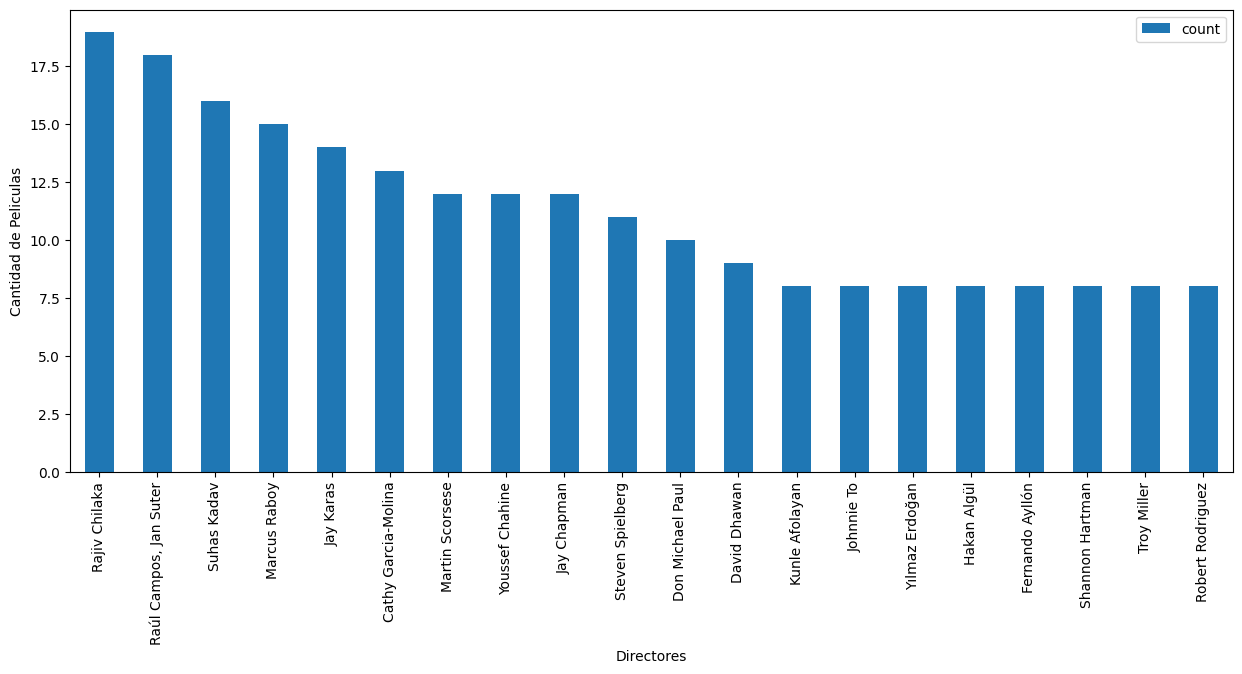

In [15]:
#Grafica | Directores con mas Peliculas
data_directorframe[:20].plot(kind='bar', figsize=[15,6])

plt.ylabel('Cantidad de Peliculas')
plt.xlabel('Directores')


In [16]:
#Actores con mas peliculas

data_pelicula_actor = data_peliculas.set_index('title').cast.str.split(', ',expand=True).stack().reset_index(level=1, drop=True)

data_pelicula_actor = pd.DataFrame(data_pelicula_actor)

Text(0.5, 0, 'Actores')

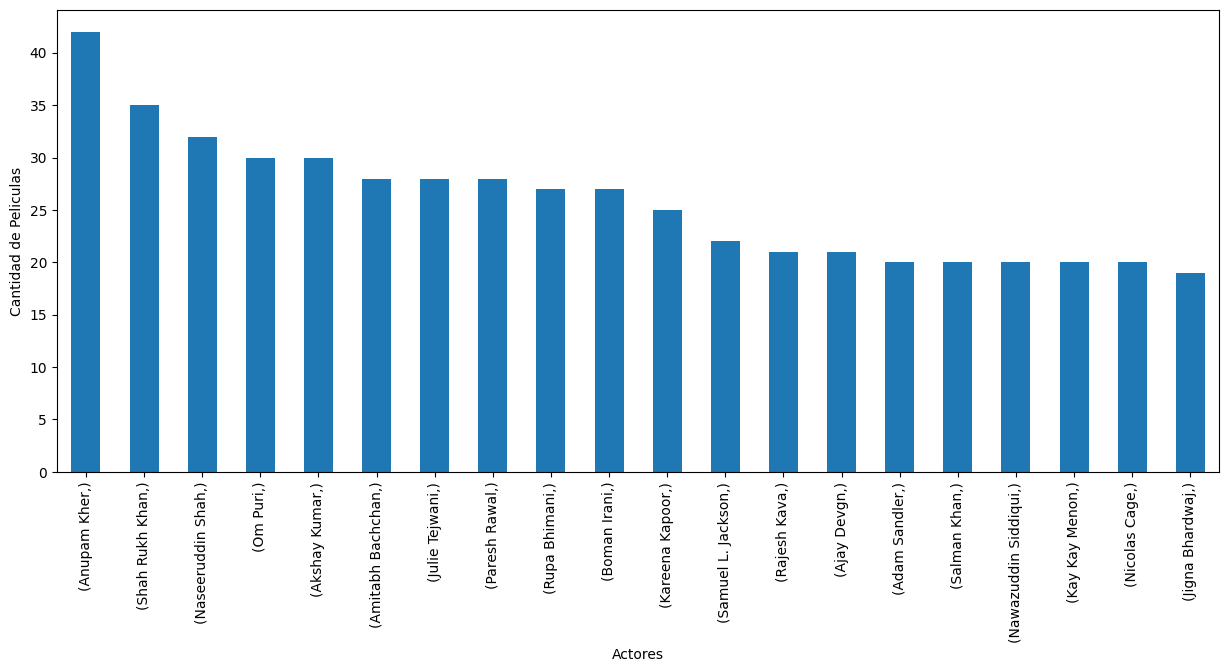

In [17]:
#Grafica | Actores con mas peliculas
top_actor_pelicula = data_pelicula_actor.value_counts()

top_actor_pelicula[:20].plot(kind='bar', figsize=[15,6])

plt.ylabel('Cantidad de Peliculas')
plt.xlabel('Actores')
#plt.yticks([3, 6, 9, 12, 15, 18, 21])

In [18]:
#Peliculas por Categoria
data_pelicula_categoria = data_peliculas.set_index('title').listed_in.str.split(', ',expand=True).stack().reset_index(level=1, drop=True)
data_pelicula_categoria

title
Dick Johnson Is Dead                           Documentaries
My Little Pony: A New Generation    Children & Family Movies
Sankofa                                               Dramas
Sankofa                                   Independent Movies
Sankofa                                 International Movies
                                              ...           
Zoom                                Children & Family Movies
Zoom                                                Comedies
Zubaan                                                Dramas
Zubaan                                  International Movies
Zubaan                                      Music & Musicals
Length: 13190, dtype: object

In [19]:
top_categoria = data_pelicula_categoria.value_counts()
top_categoria

International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Horror Movies                357
Stand-Up Comedy              343
Sci-Fi & Fantasy             243
Sports Movies                219
Classic Movies               116
LGBTQ Movies                 102
Anime Features                71
Cult Movies                   71
Faith & Spirituality          65
Movies                        57
Name: count, dtype: int64

<Axes: xlabel='count'>

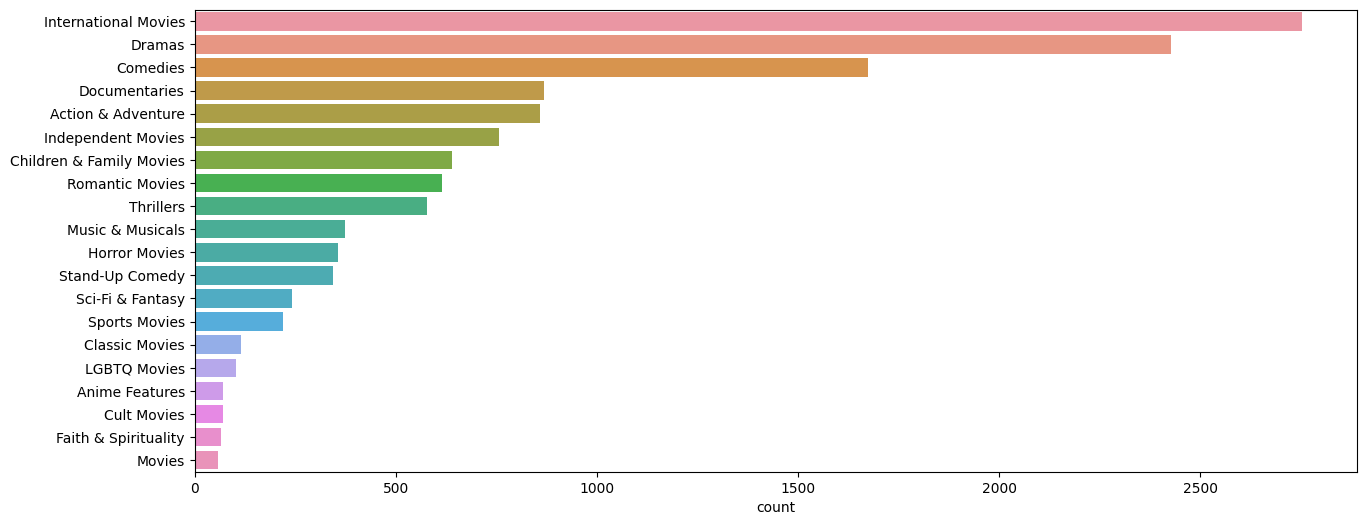

In [20]:
#Grafica | #Peliculas por Categoria
plt.figure(figsize=(15,6))

sns.countplot(y= data_pelicula_categoria, order= data_pelicula_categoria.value_counts().index[:20] )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72]),
 [Text(0, 0, '1942'),
  Text(1, 0, '1943'),
  Text(2, 0, '1944'),
  Text(3, 0, '1945'),
  Text(4, 0, '1946'),
  Text(5, 0, '1947'),
  Text(6, 0, '1954'),
  Text(7, 0, '1955'),
  Text(8, 0, '1956'),
  Text(9, 0, '1958'),
  Text(10, 0, '1959'),
  Text(11, 0, '1960'),
  Text(12, 0, '1961'),
  Text(13, 0, '1962'),
  Text(14, 0, '1963'),
  Text(15, 0, '1964'),
  Text(16, 0, '1965'),
  Text(17, 0, '1966'),
  Text(18, 0, '1967'),
  Text(19, 0, '1968'),
  Text(20, 0, '1969'),
  Text(21, 0, '1970'),
  Text(22, 0, '1971'),
  Text(23, 0, '1972'),
  Text(24, 0, '1973'),
  Text(25, 0, '1974'),
  Text(26, 0, '1975'),
  Text(27, 0, '1976'),
  Text(28, 0, '1977'),
  Text(29

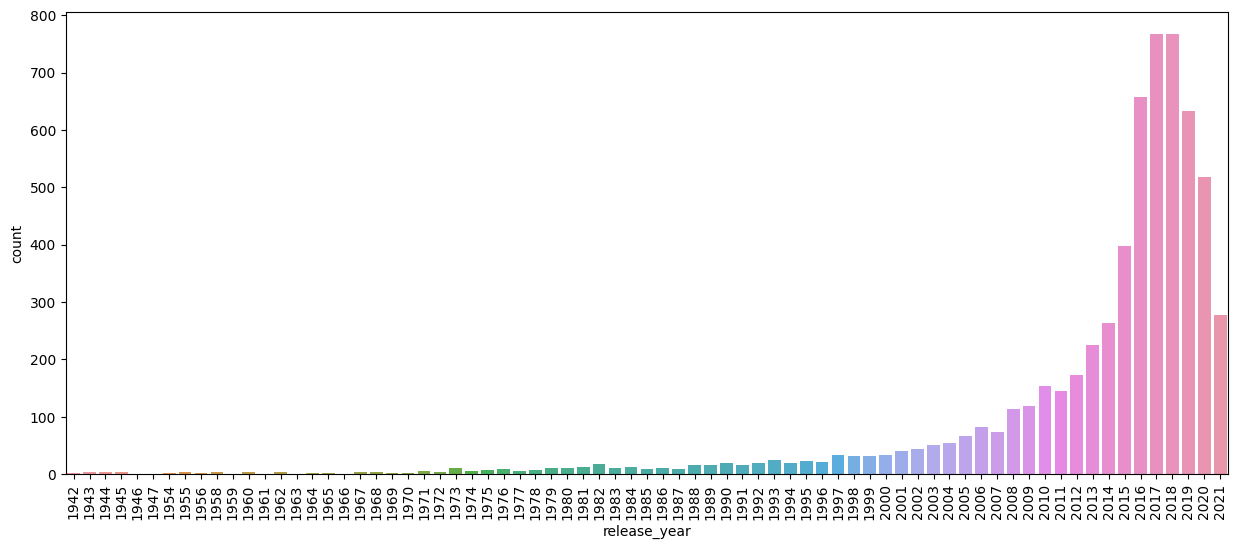

In [21]:
#Año de Cada Produccion
plt.figure(figsize=(15,6))

sns.countplot(x= data_peliculas['release_year'], data= data_peliculas )

plt.xticks(rotation=90)

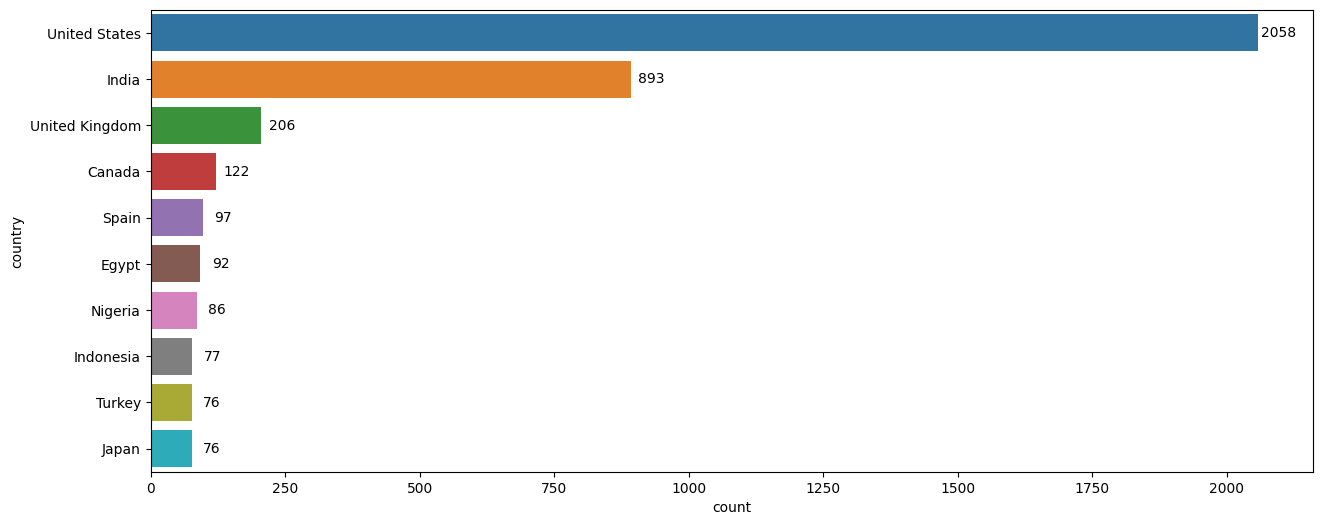

In [31]:
#Grafica | Donde se realizan mas peliculas
plt.figure(figsize=(15,6))

ax = sns.countplot(y='country', data= data_peliculas, order= data_peliculas['country'].value_counts().index[:10] )

for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), (p.get_width()+ 25, p.get_y() + p.get_height()/2),
              ha= 'center', va= 'center', xytext= (5,0), textcoords= 'offset points')

SHOWS DE TV 

In [25]:
# Shows de Tv
data_tv_show = datos[datos['type']== 'TV Show']

In [27]:
#Directores con mas Shows de TV
data_director_tv = data_tv_show['director'].value_counts()

data_directorFrametv = pd.DataFrame(data_director_tv)
data_directorFrametv.head()

,count
director,
Alastair Fothergill,3
Rob Seidenglanz,2
Hsu Fu-chun,2
Iginio Straffi,2
Shin Won-ho,2


Text(0.5, 0, 'Directiores')

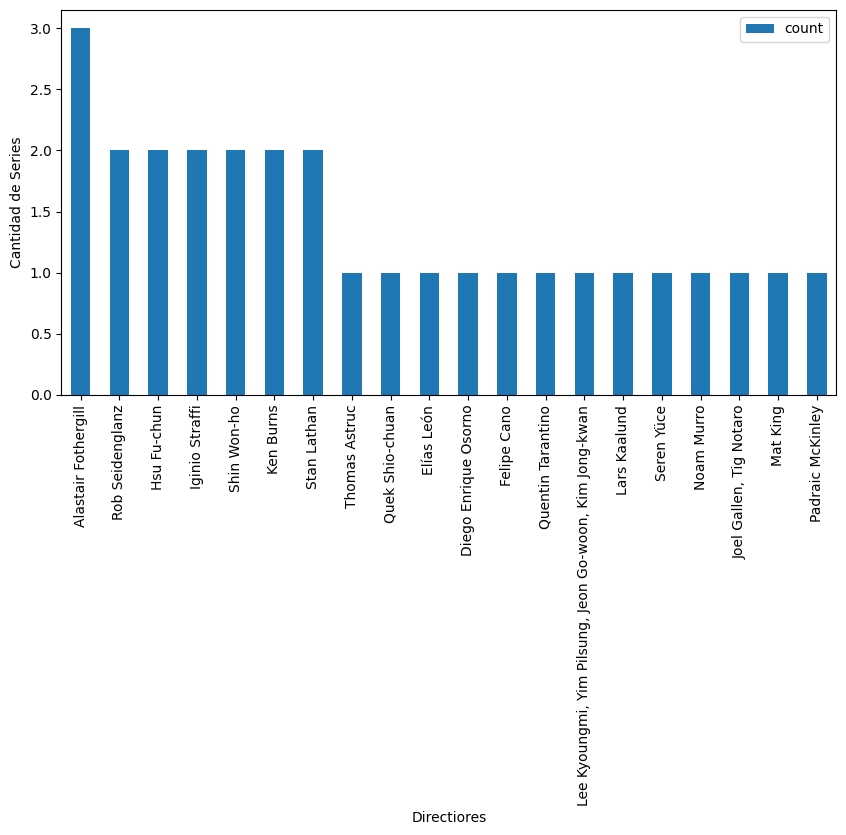

In [29]:
#Grafica | Directores con mas Shows de TV
data_directorFrametv[:20].plot(kind='bar', figsize=[10,5])
plt.ylabel('Cantidad de Series')
plt.xlabel('Directiores')

In [34]:
#Actores con mas Tv Shows
data_tv_actor = data_tv_show.set_index('title').cast.str.split(', ',expand=True).stack().reset_index(level=1, drop=True)

data_tv_actor = pd.DataFrame(data_tv_actor)

data_tv_actor.head()

,0
title,
Blood & Water,Ama Qamata
Blood & Water,Khosi Ngema
Blood & Water,Gail Mabalane
Blood & Water,Thabang Molaba
Blood & Water,Dillon Windvogel


In [36]:
#Conteo | Actores con mas Tv Shows
top_actor_tv = data_tv_actor.value_counts()
top_actor_tv

Takahiro Sakurai         25
Yuki Kaji                19
Junichi Suwabe           17
Daisuke Ono              17
Ai Kayano                17
                         ..
Ivy Yin                   1
Iván Pellicer             1
Iván Álvarez de Araya     1
Iza Moreira               1
Şükrü Özyıldız            1
Name: count, Length: 14863, dtype: int64

Text(0.5, 0, 'Actores')

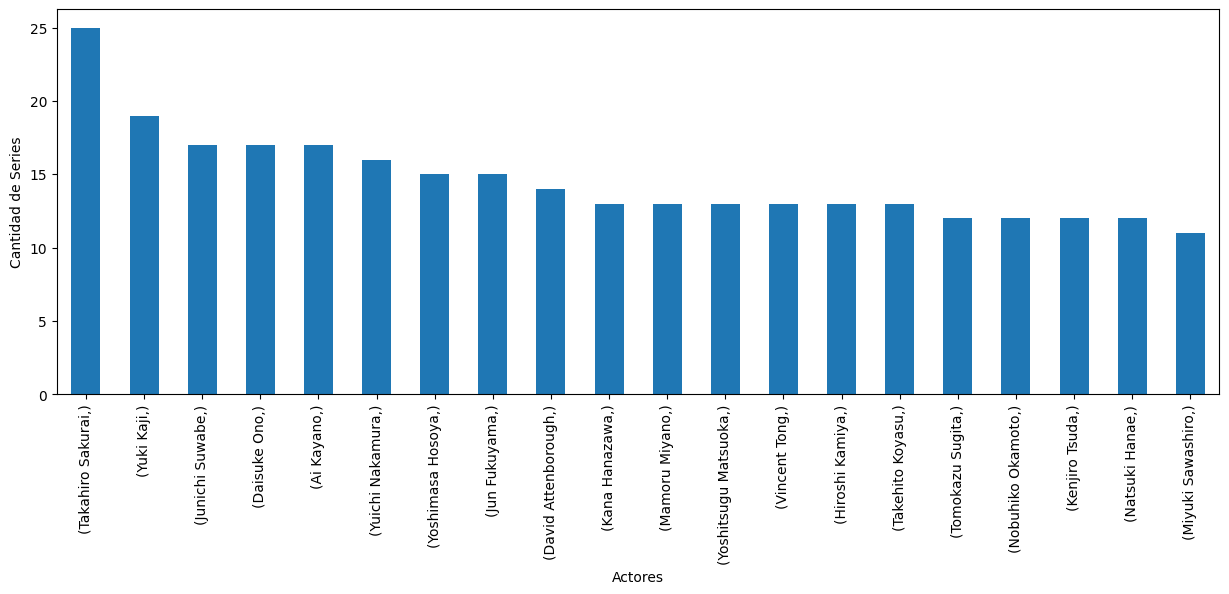

In [38]:
#Gráfica | Actores con mas Tv Shows
top_actor_tv[:20].plot(kind='bar', figsize=[15,5]) 
plt.ylabel('Cantidad de Series')
plt.xlabel('Actores')

<Axes: xlabel='count'>

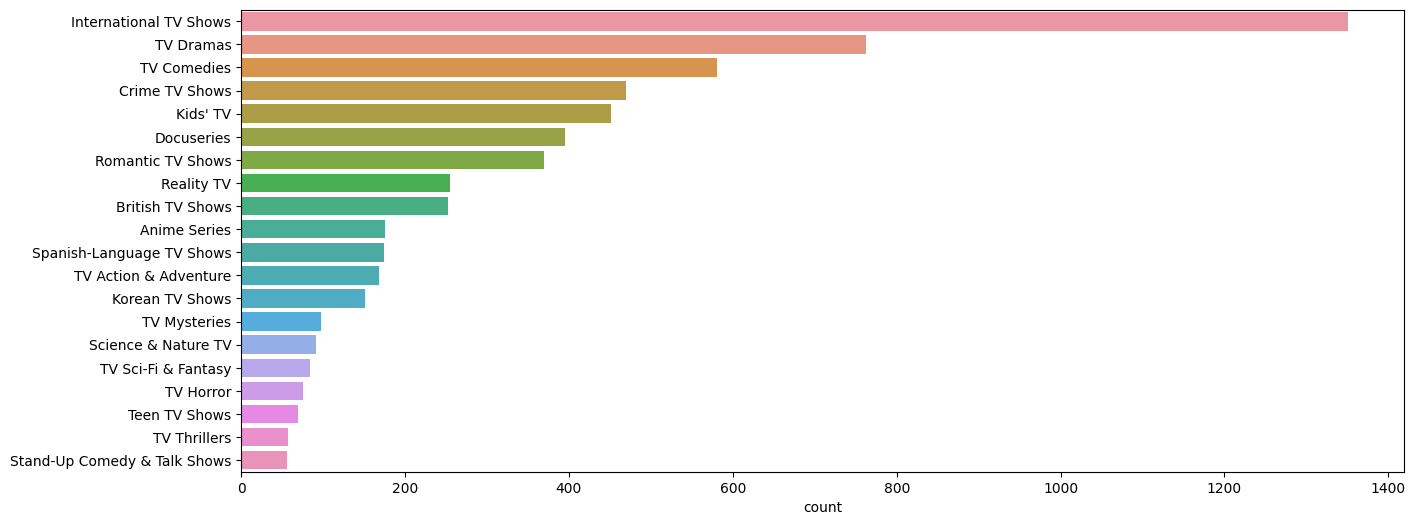

In [39]:
#Grafica | Generos de Series
plt.figure(figsize=(15,6))

data_tv_categoria = data_tv_show.set_index('title').listed_in.str.split(', ',expand=True).stack().reset_index(level=1, drop=True)

sns.countplot(y= data_tv_categoria, order= data_tv_categoria.value_counts().index[:20] )


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 [Text(0, 0, '1925'),
  Text(1, 0, '1945'),
  Text(2, 0, '1946'),
  Text(3, 0, '1963'),
  Text(4, 0, '1967'),
  Text(5, 0, '1972'),
  Text(6, 0, '1974'),
  Text(7, 0, '1977'),
  Text(8, 0, '1979'),
  Text(9, 0, '1981'),
  Text(10, 0, '1985'),
  Text(11, 0, '1986'),
  Text(12, 0, '1988'),
  Text(13, 0, '1989'),
  Text(14, 0, '1990'),
  Text(15, 0, '1991'),
  Text(16, 0, '1992'),
  Text(17, 0, '1993'),
  Text(18, 0, '1994'),
  Text(19, 0, '1995'),
  Text(20, 0, '1996'),
  Text(21, 0, '1997'),
  Text(22, 0, '1998'),
  Text(23, 0, '1999'),
  Text(24, 0, '2000'),
  Text(25, 0, '2001'),
  Text(26, 0, '2002'),
  Text(27, 0, '2003'),
  Text(28, 0, '2004'),
  Text(29, 0, '2005'),
  Text(30, 0, '2006'),
  Text(31, 0, '2007'),
  Text(32, 0, '2008'),
  Text(33, 0, '2009'),
  Text(34, 0, '201

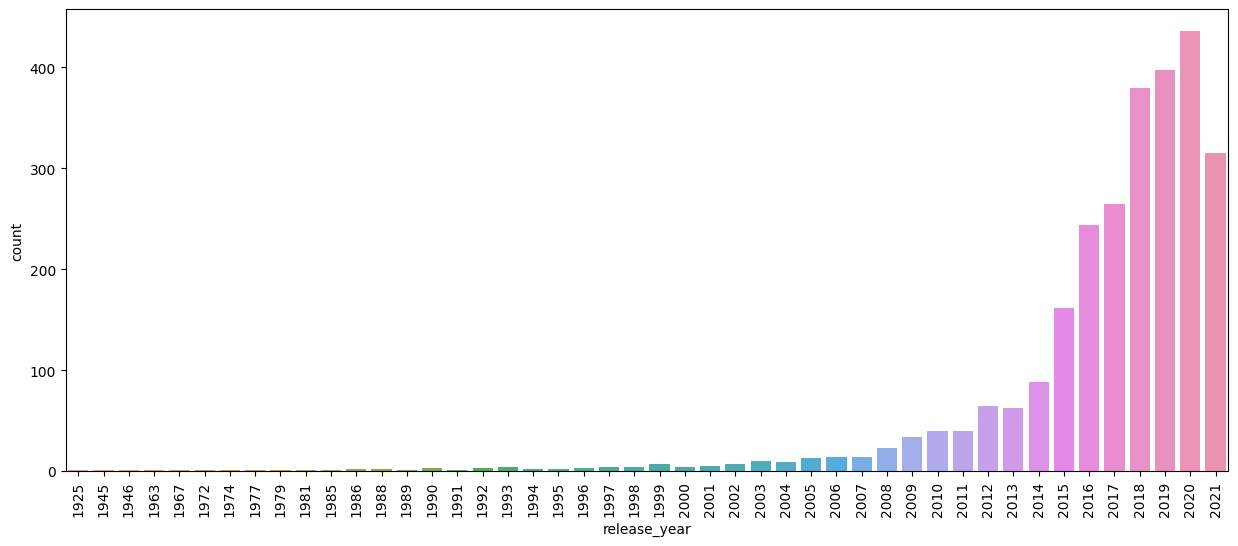

In [40]:
#Grafica | Año de Produccion de Tv Show
plt.figure(figsize=(15,6))

sns.countplot(x= data_tv_show['release_year'], data= data_tv_show )

plt.xticks(rotation=90)

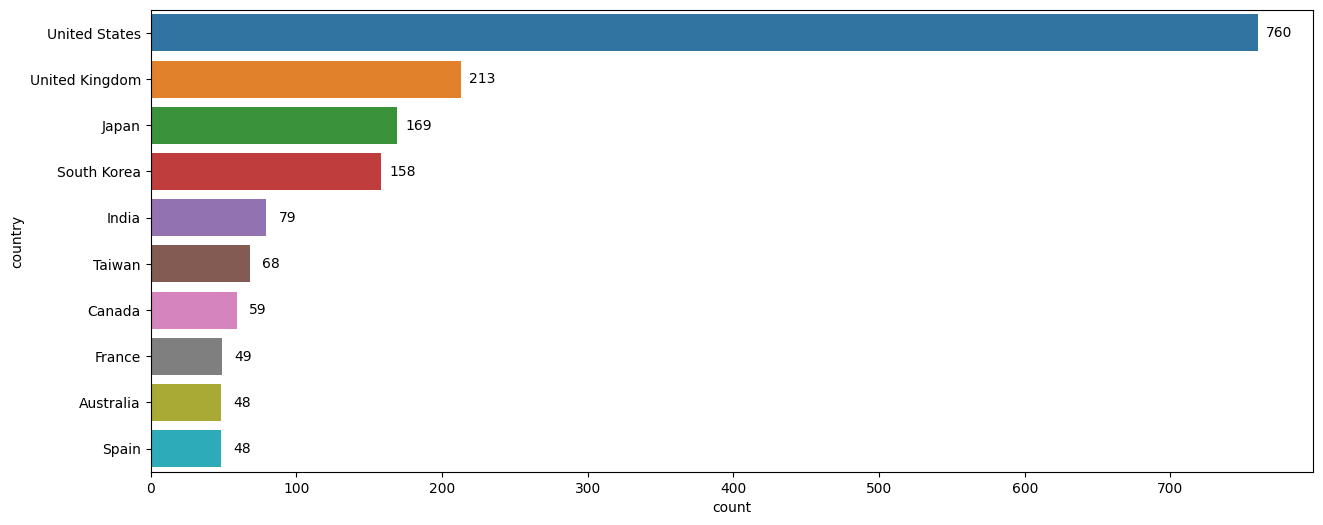

In [41]:
#Grafica | Paises donde de producen mas series
plt.figure(figsize=(15,6))

ax = sns.countplot(y='country', data= data_tv_show, order= data_tv_show['country'].value_counts().index[:10] )

for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), (p.get_width()+ 10, p.get_y() + p.get_height()/2),
              ha= 'center', va= 'center', xytext= (5,0), textcoords= 'offset points')